<a href="https://colab.research.google.com/github/rishabhk1501/Data-Analytics-Tasks/blob/main/session_23_task_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('dark_background')

## `Problem 1 to 5`:

Dataset link: https://tinyurl.com/2fe6vz4u

**Add a label to every axis and add a proper title for the charts. Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **`Problem-1:`** Draw a line plot of which, the x-axis is the "Year" and the y-axis is sum of "PM2.5" of two countries Iran and China.

In [2]:
# code here
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df.head()

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018


In [3]:
df['Year'].unique()

array([2016, 2012, 2010, 2013, 2015, 2014, 2009, 2017, 2011, 2008])

In [4]:
df['Country'].unique()

array(['India', 'Cameroon', 'Pakistan', 'Uganda', 'Bangladesh', 'China',
       'Qatar', 'Mongolia', 'Kuwait', 'Saudi Arabia', 'Chile', 'Bahrain',
       'Iran', 'Bosnia and Herzegovina', 'South Africa', 'Ghana', 'Nepal',
       'Vietnam', 'Philippines', 'Indonesia', 'Colombia', 'Guatemala',
       'Croatia', 'North Macedonia', 'Peru', 'Turkey', 'Madagascar',
       'Mexico', 'Cuba', 'Lebanon', 'Poland', 'Taiwan', 'Czech Republic',
       'Republic of Korea', 'Costa Rica', 'Italy', 'Bulgaria', 'Israel',
       'Morocco', 'Thailand', 'El Salvador'], dtype=object)

In [5]:
temp = df[df['Country'].isin(['Iran','China'])].pivot_table(index='Year',columns='Country',values='PM2.5',aggfunc='sum')
temp = temp.reset_index()
temp

Country,Year,China,Iran
0,2012,NaN,37.0
1,2013,NaN,66.0
2,2014,2725.0,31.0
3,2015,425.0,NaN
4,2016,11106.0,1453.0


<Axes: title={'center': 'Yearly Trend of PM 2.5'}, xlabel='Year', ylabel='PM 2.5'>

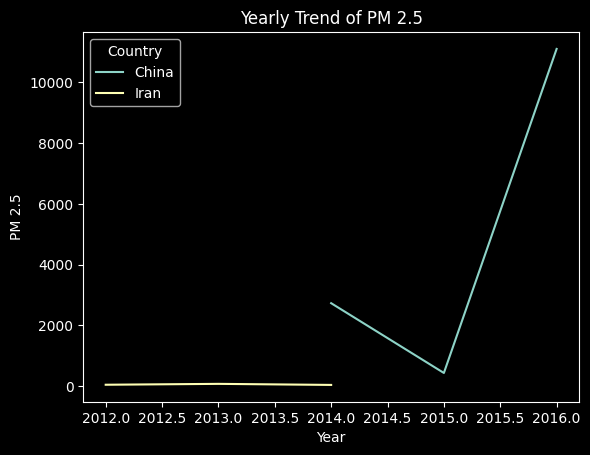

In [6]:
# Using Pandas Plot

temp.plot(kind='line',x='Year',y=['China','Iran'],title='Yearly Trend of PM 2.5',ylabel='PM 2.5')

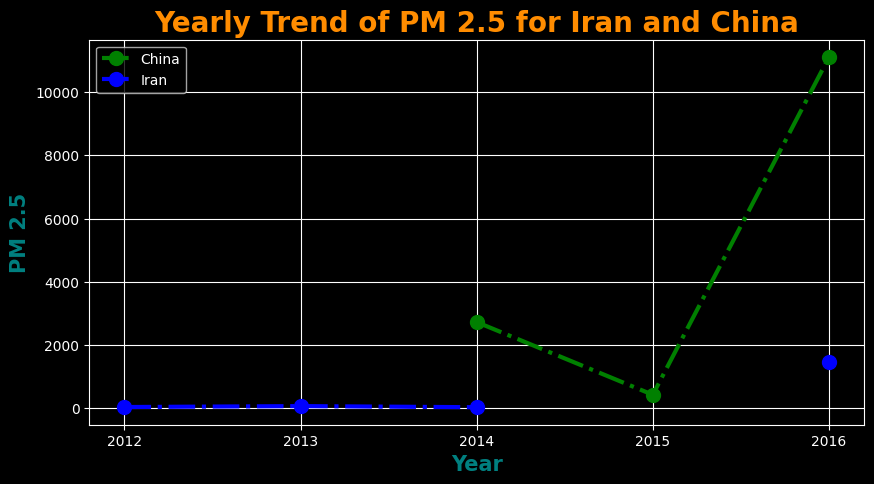

In [7]:
# Using Matplotlib

plt.figure(figsize=(10,5))
plt.plot(temp['China'],color='green',linestyle='dashdot',linewidth=3,label='China',marker='o',markersize=10)
plt.plot(temp['Iran'],color='blue',linestyle='dashdot',linewidth=3,label='Iran',marker='o',markersize=10)

plt.xlabel('Year',fontdict={'fontsize':15,'weight': 'bold','color': '#008080'})
plt.ylabel('PM 2.5',fontdict={'fontsize':15,'weight': 'bold','color': '#008080'})
plt.title('Yearly Trend of PM 2.5 for Iran and China',fontdict={'fontsize':20,'weight': 'bold','color': '#FF8C00'})
plt.xticks(np.arange(temp.shape[0]),temp['Year'].unique())
plt.legend()

plt.grid()
plt.show()

### **`Problem-2:`** Draw a histogram of the  column "PM10" of which the y-axis represents the probability (see the documentation how to draw the probability).

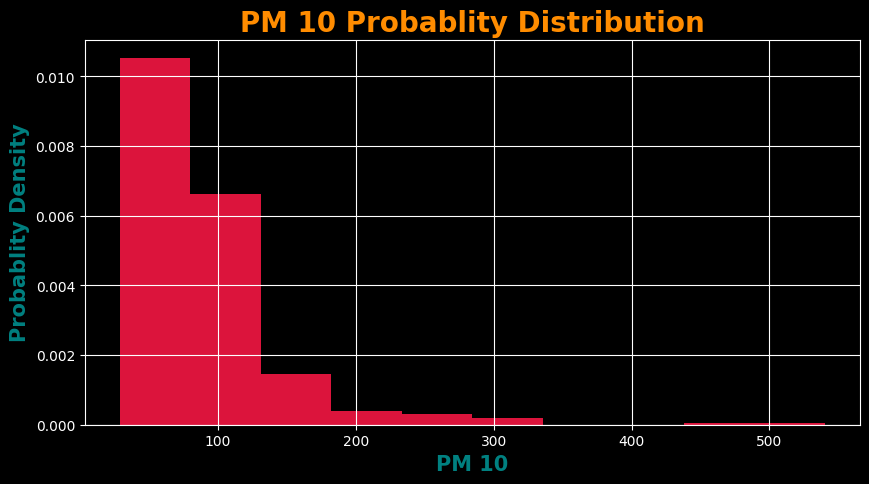

In [8]:
plt.figure(figsize=(10,5))
plt.hist(df['PM10'],density=True,color='#DC143C')

plt.title('PM 10 Probablity Distribution',fontdict={'fontsize':20,'weight': 'bold','color': '#FF8C00'})
plt.xlabel('PM 10',fontdict={'fontsize':15,'weight': 'bold','color': '#008080'})
plt.ylabel('Probablity Density',fontdict={'fontsize':15,'weight': 'bold','color': '#008080'})

plt.grid()
plt.show()

### **`Problem-3:`** Draw a scatter plot where x-axis represents "PM2.5" and y-axis represents "PM10" for two countries Poland and Chile.

In [9]:
temp = df[df['Country'].isin(['Poland','Chile'])][['Country','PM2.5','PM10']]

In [10]:
temp = temp.replace({'Poland':0,'Chile':1})

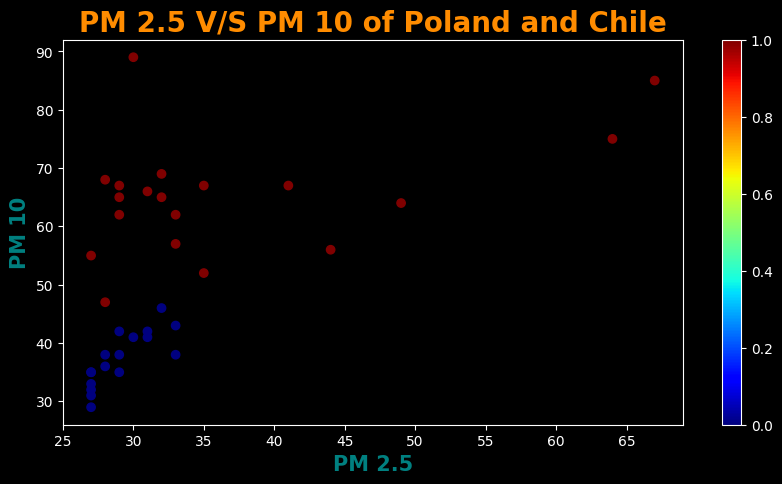

In [11]:
# Using Colored Scatterplot
plt.figure(figsize=(10,5))
plt.scatter(temp['PM2.5'],temp['PM10'],c=temp['Country'],cmap='jet')
plt.colorbar()

plt.title('PM 2.5 V/S PM 10 of Poland and Chile',fontdict={'fontsize':20,'weight': 'bold','color': '#FF8C00'})
plt.xlabel('PM 2.5',fontdict={'fontsize':15,'weight': 'bold','color': '#008080'})
plt.ylabel('PM 10',fontdict={'fontsize':15,'weight': 'bold','color': '#008080'})


plt.show()

In [12]:
temp = df[df['Country'].isin(['Poland','Chile'])][['Country','PM2.5','PM10']]

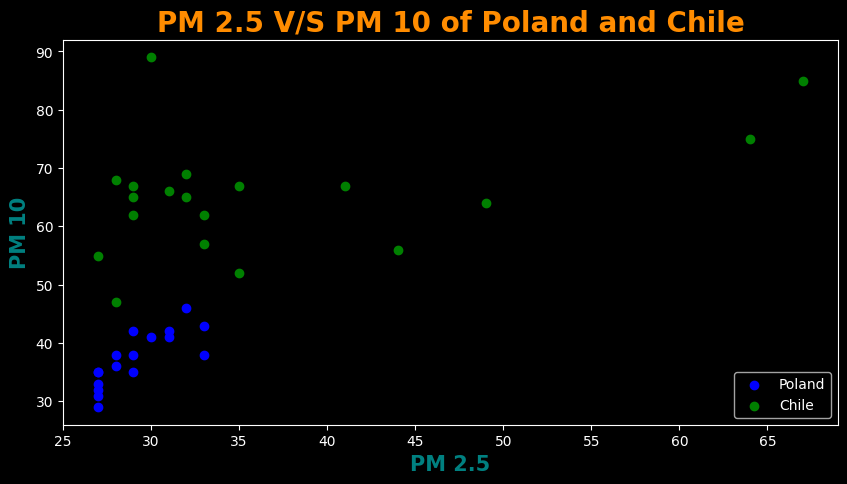

In [33]:
# Using standard scatter plot with legend
plt.figure(figsize=(10,5))

plt.scatter(temp[temp['Country']=='Poland']['PM2.5'],temp[temp['Country']=='Poland']['PM10'],label='Poland',color='blue')
plt.scatter(temp[temp['Country']=='Chile']['PM2.5'],temp[temp['Country']=='Chile']['PM10'],label='Chile',color='green')

plt.title('PM 2.5 V/S PM 10 of Poland and Chile',fontdict={'fontsize':20,'weight': 'bold','color': '#FF8C00'})
plt.xlabel('PM 2.5',fontdict={'fontsize':15,'weight': 'bold','color': '#008080'})
plt.ylabel('PM 10',fontdict={'fontsize':15,'weight': 'bold','color': '#008080'})

plt.legend(loc='best')
plt.show()

### **`Problem-4:`** Draw a pie chart of top 5 most frequent countries.

In [42]:
df['Country'].value_counts().sort_values(ascending=False).head(5).index

Index(['China', 'Iran', 'India', 'Chile', 'Poland'], dtype='object', name='Country')

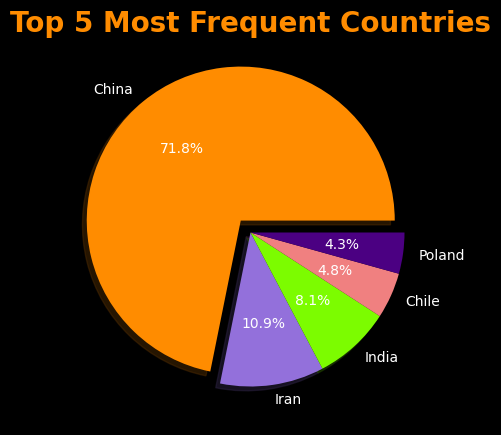

In [38]:
plt.figure(figsize=(10,5))

plt.pie(df['Country'].value_counts().sort_values(ascending=False).head(5),labels=df['Country'].value_counts().sort_values(ascending=False).head(5).index,autopct='%0.1f%%',colors=['#FF8C00','#9370DB','#7CFC00','#F08080','#4B0082'],shadow=True,explode=[0.1,0,0,0,0])
plt.title('Top 5 Most Frequent Countries',fontdict={'fontsize':20,'weight': 'bold','color': '#FF8C00'})

plt.show()

### **`Problem-5:`** Draw a bar chart which represents the counts of top 5 most frequent countries.



In [46]:
df['Country'].value_counts().sort_values(ascending=False).head(5).values

array([283,  43,  32,  19,  17])

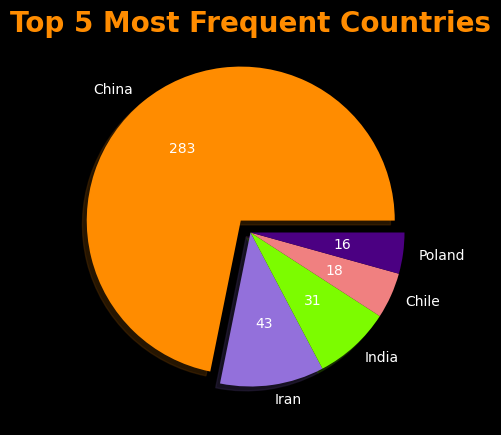

In [47]:
plt.figure(figsize=(10,5))
sizes = df['Country'].value_counts().sort_values(ascending=False).head(5).values
def absolute_value(val):
    a = int(val/100.*sum(sizes))
    return f'{a}'
plt.pie(df['Country'].value_counts().sort_values(ascending=False).head(5),labels=df['Country'].value_counts().sort_values(ascending=False).head(5).index,autopct=absolute_value,colors=['#FF8C00','#9370DB','#7CFC00','#F08080','#4B0082'],shadow=True,explode=[0.1,0,0,0,0])
plt.title('Top 5 Most Frequent Countries',fontdict={'fontsize':20,'weight': 'bold','color': '#FF8C00'})

plt.show()

##`Problem 6-10`
Data Set - https://docs.google.com/spreadsheets/d/e/2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR/pub?gid=558678488&single=true&output=csv

This is a Sales data of any company in a Year.


###`Problem-6`
Show a line plot of Total Profit for each month with below styling.
* Dotted Line
* Line Color Blue
* Show Legend at top left
* Circle Marker

In [142]:
df = pd.read_csv('https://www.google.com/url?q=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR%2Fpub%3Fgid%3D558678488%26single%3Dtrue%26output%3Dcsv')

In [143]:
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month_number  12 non-null     int64
 1   facecream     12 non-null     int64
 2   facewash      12 non-null     int64
 3   toothpaste    12 non-null     int64
 4   bathingsoap   12 non-null     int64
 5   shampoo       12 non-null     int64
 6   moisturizer   12 non-null     int64
 7   total_units   12 non-null     int64
 8   total_profit  12 non-null     int64
dtypes: int64(9)
memory usage: 992.0 bytes


In [145]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert month_number to month name
df['month_name'] = df['month_number'].apply(lambda x: month_names[x-1])




In [146]:
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit,month_name
0,1,2500,1500,5200,9200,1200,1500,21100,211000,January
1,2,2630,1200,5100,6100,2100,1200,18330,183300,February
2,3,2140,1340,4550,9550,3550,1340,22470,224700,March
3,4,3400,1130,5870,8870,1870,1130,22270,222700,April
4,5,3600,1740,4560,7760,1560,1740,20960,209600,May
5,6,2760,1555,4890,7490,1890,1555,20140,201400,June
6,7,2980,1120,4780,8980,1780,1120,29550,295500,July
7,8,3700,1400,5860,9960,2860,1400,36140,361400,August
8,9,3540,1780,6100,8100,2100,1780,23400,234000,September
9,10,1990,1890,8300,10300,2300,1890,26670,266700,October


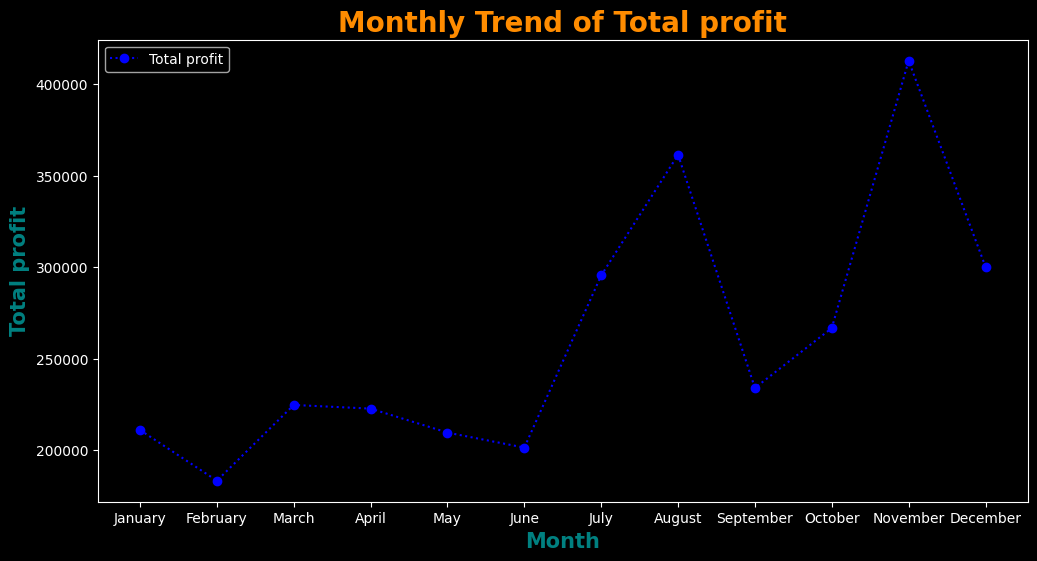

In [148]:
plt.figure(figsize=(12,6))
plt.plot(df['month_name'],df['total_profit'],linestyle='dotted',color='blue',label='Total profit',marker='o')
plt.title('Monthly Trend of Total profit',fontdict={'fontsize':20,'weight': 'bold','color': '#FF8C00'})
plt.xlabel('Month',fontdict={'fontsize':15,'weight': 'bold','color': '#008080'})
plt.ylabel('Total profit',fontdict={'fontsize':15,'weight': 'bold','color': '#008080'})
plt.legend(loc='upper left')

plt.show()

###`Problem-7`
Show sales of each product in march month as pie chart.
* Show Percentage value
* Give Title "Sales in March"
* Explode ToothPaste with shadow

In [149]:
temp = df[df['month_name'] == 'March'].T.reset_index().rename(columns={'index':'Col A',2:'Col B'}).iloc[1:7]
temp

,Col A,Col B
1,facecream,2140
2,facewash,1340
3,toothpaste,4550
4,bathingsoap,9550
5,shampoo,3550
6,moisturizer,1340


<Axes: title={'center': 'Sales in March'}>

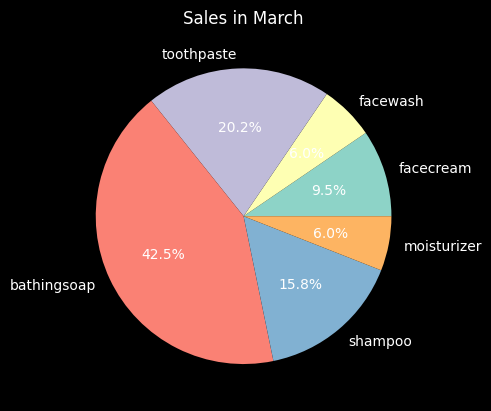

In [150]:
temp['Col B'].plot(kind='pie',labels=temp['Col A'].unique(),autopct='%0.1f%%',ylabel='',title='Sales in March')

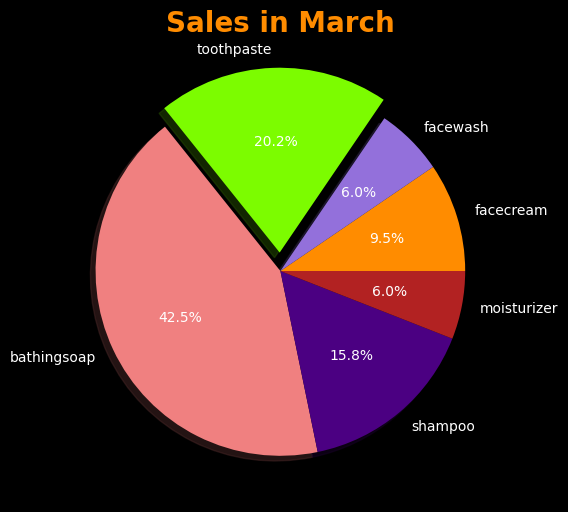

In [151]:
plt.figure(figsize=(12,6))
plt.pie(temp['Col B'],labels=temp['Col A'],autopct='%0.1f%%',shadow=True,explode=[0,0,0.1,0,0,0],colors=['#FF8C00','#9370DB','#7CFC00','#F08080','#4B0082','#B22222'])
plt.title('Sales in March',fontdict={'fontsize':20,'weight': 'bold','color': '#FF8C00'})


plt.show()

###`Problem-8` Multiline Plot of all products sales.
* Give different styes for each products
* Add legend at top right

In [152]:
temp = df.iloc[:,1:].set_index('month_name').reset_index().iloc[:,:7]
temp

,month_name,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,January,2500,1500,5200,9200,1200,1500
1,February,2630,1200,5100,6100,2100,1200
2,March,2140,1340,4550,9550,3550,1340
3,April,3400,1130,5870,8870,1870,1130
4,May,3600,1740,4560,7760,1560,1740
5,June,2760,1555,4890,7490,1890,1555
6,July,2980,1120,4780,8980,1780,1120
7,August,3700,1400,5860,9960,2860,1400
8,September,3540,1780,6100,8100,2100,1780
9,October,1990,1890,8300,10300,2300,1890


<Axes: >

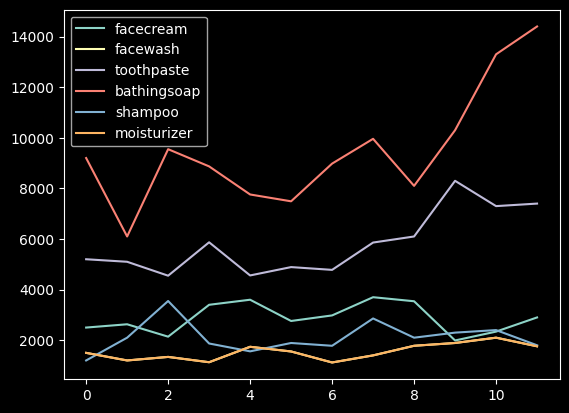

In [153]:
temp.plot()

In [154]:
'#FF8C00','#9370DB','#7CFC00','#F08080','#4B0082','#B22222'

('#FF8C00', '#9370DB', '#7CFC00', '#F08080', '#4B0082', '#B22222')

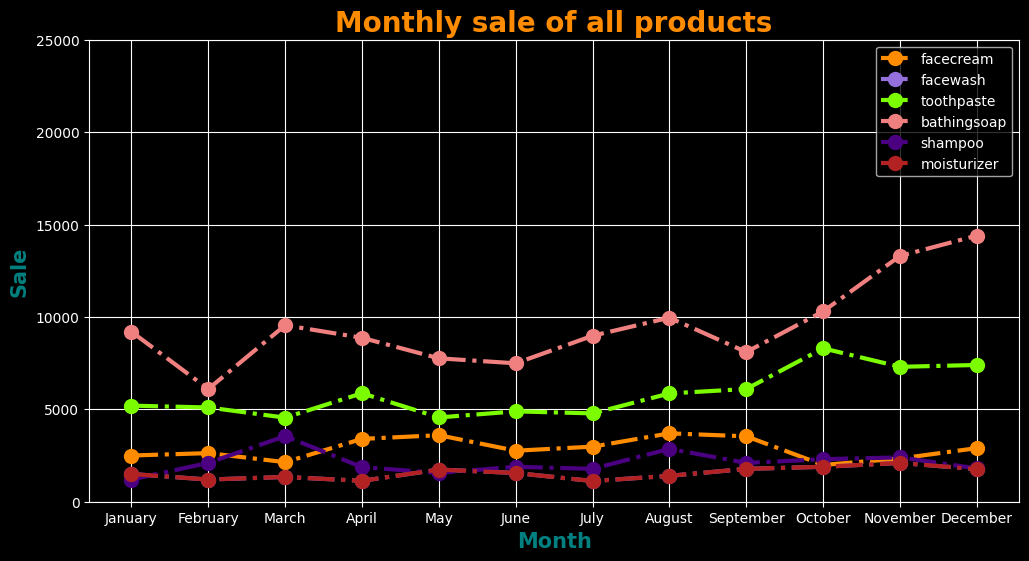

In [155]:
# Using Matplotlib

plt.figure(figsize=(12,6))
plt.plot(temp['facecream'],color='#FF8C00',linestyle='dashdot',linewidth=3,label='facecream',marker='o',markersize=10)
plt.plot(temp['facewash'],color='#9370DB',linestyle='dashdot',linewidth=3,label='facewash',marker='o',markersize=10)
plt.plot(temp['toothpaste'],color='#7CFC00',linestyle='dashdot',linewidth=3,label='toothpaste',marker='o',markersize=10)
plt.plot(temp['bathingsoap'],color='#F08080',linestyle='dashdot',linewidth=3,label='bathingsoap',marker='o',markersize=10)
plt.plot(temp['shampoo'],color='#4B0082',linestyle='dashdot',linewidth=3,label='shampoo',marker='o',markersize=10)
plt.plot(temp['moisturizer'],color='#B22222',linestyle='dashdot',linewidth=3,label='moisturizer',marker='o',markersize=10)


plt.xlabel('Month',fontdict={'fontsize':15,'weight': 'bold','color': '#008080'})
plt.ylabel('Sale',fontdict={'fontsize':15,'weight': 'bold','color': '#008080'})
plt.title('Monthly sale of all products',fontdict={'fontsize':20,'weight': 'bold','color': '#FF8C00'})
plt.xticks(np.arange(temp.shape[0]),temp['month_name'].unique())
plt.legend(loc='upper right')
plt.ylim(0,25000)
plt.grid()
plt.show()

###`Problem-9` Show Quarter wise Sales data for all products as multi Bar chart.


In [156]:
temp['Quarter'] = pd.Series(['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3','Q4','Q4','Q4'])

In [157]:
temp = temp.iloc[:,1:].set_index('Quarter').reset_index()
temp

,Quarter,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,Q1,2500,1500,5200,9200,1200,1500
1,Q1,2630,1200,5100,6100,2100,1200
2,Q1,2140,1340,4550,9550,3550,1340
3,Q2,3400,1130,5870,8870,1870,1130
4,Q2,3600,1740,4560,7760,1560,1740
5,Q2,2760,1555,4890,7490,1890,1555
6,Q3,2980,1120,4780,8980,1780,1120
7,Q3,3700,1400,5860,9960,2860,1400
8,Q3,3540,1780,6100,8100,2100,1780
9,Q4,1990,1890,8300,10300,2300,1890


In [160]:
temp = temp.groupby('Quarter').sum()
temp

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
Quarter,,,,,,
Q1,7270,4040,14850,24850,6850,4040
Q2,9760,4425,15320,24120,5320,4425
Q3,10220,4300,16740,27040,6740,4300
Q4,7230,5750,23000,38000,6500,5750


<Axes: title={'center': 'Quarter wise Sales'}, xlabel='Quarter', ylabel='Total Sales'>

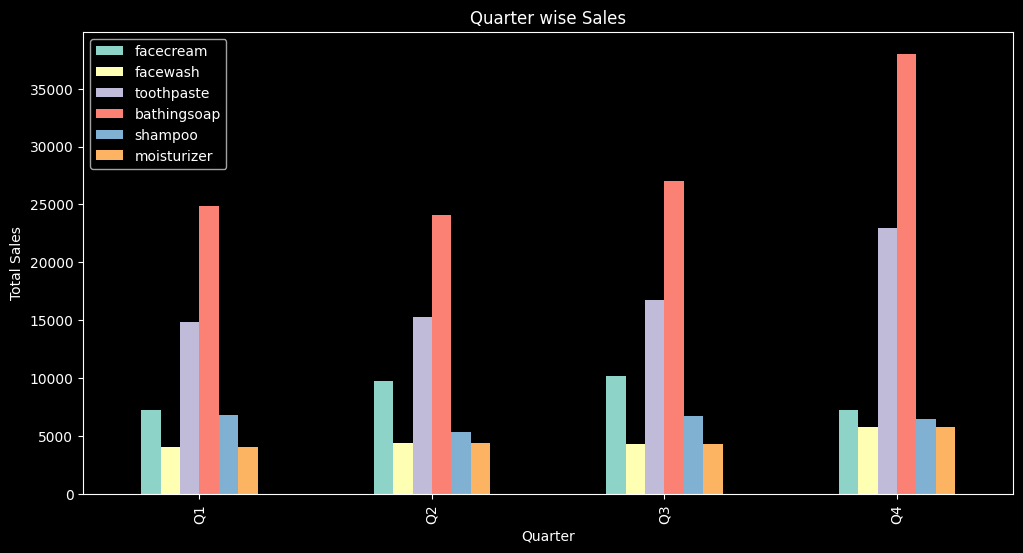

In [165]:
temp.plot(kind='bar',figsize=(12,6),title='Quarter wise Sales',ylabel='Total Sales')

###`Problem-10` Plot Stacked Bar chart quarter wise for each product.

<Axes: title={'center': 'Quarter wise Sales'}, xlabel='Quarter', ylabel='Total Sales'>

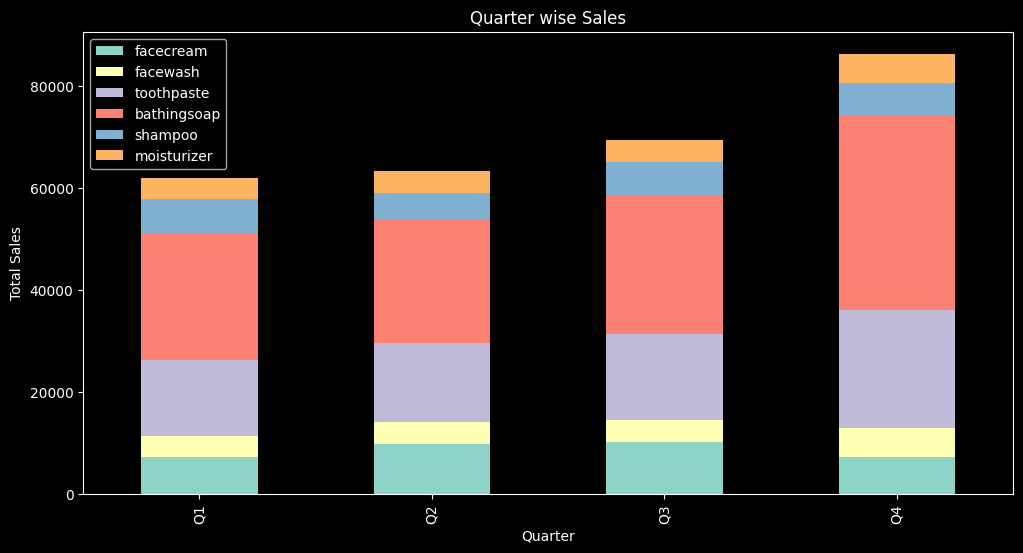

In [166]:
temp.plot(kind='bar',figsize=(12,6),title='Quarter wise Sales',ylabel='Total Sales',stacked=True)